# Context
Phase three of this project is data cleanup and dimensionality reduction.\
This notebook drives this process for the data that went through the
transformations in PH2.

In [33]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../project.env")
sys.path.append(os.environ["PYTHONPATH"])

import pickle

In [34]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import PH3header as ph3

In [35]:
PH3_IS_W2 = True

if PH3_IS_W2:
  prePH3_ROOT = sup.PH2_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_W2_CODE)
else:
  prePH3_ROOT = sup.PH1_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_WO2_CODE)

sup.report_dir_if_not_exists(prePH3_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_DATA_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_BINGEN_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_MEDIAGEN_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/data/PH2/two-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2 exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2 exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2 exists. Continuing with execution


# Source dataframe loading

In [36]:
import pandas as pd

## Per frame

In [37]:
prePH3_frame_df = pd.read_csv(os.path.join(prePH3_ROOT, "perframe.csv"))
prePH3_frame_df

,person_id,cycle_num,handedness,class_name,class_numeric,fileid,current_frame,h0x,h0y,h0z,...,cp0z,cp11x,cp11y,cp11z,cp12x,cp12y,cp12z,cp_h_mean_x,cp_h_mean_y,cp_h_mean_z
0,p01,1,0,a,0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,0,0.356595,0.485021,-1.312914e-07,...,-0.181956,-2.098741,0.873798,0.027716,-2.306700,1.885125,-0.694826,-2.896234,1.150676,-0.222430
1,p01,1,0,a,0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,0,0.567594,0.906298,4.943682e-09,...,-0.181956,-3.480238,0.964271,0.265744,-2.306700,1.885125,-0.694826,-2.414786,1.221503,-0.128008
2,p01,1,0,a,0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,1,0.352816,0.484037,-1.180915e-07,...,-0.333521,-2.066678,1.008282,-0.080830,-2.165842,2.062525,-0.801491,-2.825404,1.313214,-0.356977
3,p01,1,0,a,0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,1,0.567833,0.905873,4.337321e-09,...,-0.333521,-3.455541,1.185928,0.076849,-2.165842,2.062525,-0.801491,-2.343657,1.351576,-0.232162
4,p01,1,0,a,0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,2,0.351332,0.480660,-1.254345e-07,...,-0.233376,-2.168897,0.905824,0.014499,-2.366600,1.999840,-0.726445,-2.981283,1.221755,-0.257633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,p11,5,1,b,1,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,9,0.405674,0.764709,5.895547e-08,...,-0.084159,-2.557804,1.086794,0.216372,-1.526016,1.644848,-0.550490,-1.936456,1.060899,-0.106899
5002,p11,5,1,b,1,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,10,0.633578,0.386601,-1.037258e-07,...,-0.062124,-1.350568,0.798976,0.045304,-1.538694,1.641183,-0.535136,-1.488300,1.035166,0.027075
5003,p11,5,1,b,1,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,10,0.404680,0.765115,4.365882e-08,...,-0.062124,-2.565837,1.078161,0.218660,-1.538694,1.641183,-0.535136,-1.948699,1.025206,-0.083890
5004,p11,5,1,b,1,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,11,0.633556,0.386977,-1.034930e-07,...,0.009736,-1.291110,0.718431,0.083880,-1.526755,1.476018,-0.468762,-1.434433,0.942531,0.069260


## Per video

In [38]:
prePH3_video_df = pd.read_csv(os.path.join(prePH3_ROOT, "pervideo.csv"))
prePH3_video_df

,person_id,cycle_num,handedness,class_name,class_numeric,f0_h0x,f0_h0y,f0_h0z,f0_h1x,f0_h1y,...,f11_cp0z,f11_cp11x,f11_cp11y,f11_cp11z,f11_cp12x,f11_cp12y,f11_cp12z,f11_cp_h_mean_x,f11_cp_h_mean_y,f11_cp_h_mean_z
0,p01,1,0,a,0,0.356595,0.485021,-1.312914e-07,0.373518,0.459913,...,-0.058999,-2.195826,0.758305,0.120381,-2.498878,1.796790,-0.575941,-3.106573,0.953093,-0.090265
1,p01,1,0,b,1,0.348771,0.466237,4.743118e-08,0.363611,0.446080,...,-0.160177,-2.021350,0.773495,0.047998,-2.356061,1.763877,-0.672998,-2.971662,1.030349,-0.193626
2,p01,1,1,a,0,0.475774,0.927311,-9.812992e-08,0.494941,0.935337,...,-0.644612,-1.964399,1.739916,-0.185610,-1.559865,3.232175,-1.054860,-1.728090,2.489934,-0.456677
3,p01,1,1,b,1,0.673130,0.452971,-6.348814e-09,0.662367,0.436210,...,-0.532817,-1.907883,1.487157,-0.082033,-1.745100,2.917575,-0.980489,-1.763566,2.255293,-0.365618
4,p01,2,0,a,0,0.356703,0.455645,-1.280792e-07,0.373605,0.434001,...,0.004046,-2.093710,0.708905,0.165053,-2.465204,1.695280,-0.506559,-2.970079,0.907383,-0.015506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,p11,4,1,b,1,0.645514,0.291388,-1.497878e-07,0.628773,0.270614,...,-0.019268,-0.874001,0.544017,0.017931,-1.077997,1.027761,-0.438979,-1.031278,0.685579,0.029543
209,p11,5,0,a,0,0.352055,0.521995,-5.147281e-08,0.371064,0.510372,...,0.127829,-0.776137,0.577966,0.040399,-0.925767,0.882573,-0.288725,-1.376984,0.389957,0.091353
210,p11,5,0,b,1,0.365258,0.335842,-5.006000e-08,0.385060,0.323807,...,0.083438,-0.599103,0.539396,-0.020511,-0.814500,0.781035,-0.309411,-1.245915,0.376465,0.060204
211,p11,5,1,a,0,0.644268,0.334418,-1.884289e-07,0.624991,0.314313,...,-0.078067,-1.450643,0.842298,0.087333,-1.500647,1.807713,-0.559489,-1.482214,1.144109,0.018063


# Cleanup

## Drop unnecessary columns

### Per frame

In [39]:
if PH3_IS_W2:
  pf_dataCols = sup.pf_wrist_hand_landmark_columns+sup.pf_chest_pose_landmark_columns+sup.pf_h_v123_columns
else:
  pf_dataCols = sup.pf_hand_landmark_columns+sup.pf_pose_landmark_columns

In [40]:
PH3_FRM_clean_df = prePH3_frame_df[[sup.active_hand_col, sup.class_numeric_column]+pf_dataCols]
PH3_FRM_clean_df

,active_hand,class_numeric,wh0x,wh0y,wh0z,wh1x,wh1y,wh1z,wh2x,wh2y,...,cp_h_mean_z,h_v1x,h_v1y,h_v1z,h_v2x,h_v2y,h_v2z,h_v3x,h_v3y,h_v3z
0,1,0,-1.805903,-0.137558,1.396486,-1.778782,-0.152710,1.386670,-1.935053,-0.169839,...,-0.222430,0.057899,-0.998047,-0.023436,-0.221157,-0.971920,-0.080376,0.057440,0.009837,-0.276999
1,0,0,2.663624,1.025436,2.913183,2.752548,1.025157,2.927318,2.469583,0.947626,...,-0.128008,-0.193123,0.967382,-0.163938,0.143440,0.980908,-0.131321,0.033770,-0.048876,-0.328197
2,1,0,-1.830318,-0.202791,1.436107,-1.794116,-0.217605,1.428846,-1.957053,-0.243673,...,-0.356977,0.101697,-0.994756,-0.010856,-0.171527,-0.982976,-0.065856,0.054840,0.008559,-0.270593
3,0,0,2.682407,1.055953,2.956063,2.772043,1.056247,2.970350,2.485772,0.976487,...,-0.232162,-0.197447,0.966163,-0.165960,0.134540,0.981961,-0.132856,0.034606,-0.048560,-0.323873
4,1,0,-1.753665,-0.221967,1.350179,-1.721510,-0.237148,1.342926,-1.865209,-0.261927,...,-0.257633,0.107233,-0.993941,-0.024124,-0.178196,-0.980435,-0.083623,0.059464,0.013266,-0.282252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,0,1,-0.210129,1.669117,0.463588,-0.180967,1.640955,0.445547,-0.105666,1.530713,...,-0.106899,0.436674,0.291370,-0.851128,-0.140729,0.687971,-0.711963,-0.378107,-0.430674,-0.341423
5002,1,1,1.295826,-0.110650,1.655515,1.277380,-0.098276,1.663450,1.951521,-0.126874,...,0.027075,-0.055901,-0.998172,-0.022960,0.168659,-0.984704,-0.043723,-0.021034,0.006317,-0.223397
5003,0,1,-0.190895,1.610612,0.464539,-0.160516,1.582748,0.447754,-0.090591,1.478425,...,-0.083890,0.460711,0.295946,-0.836756,-0.139121,0.709019,-0.691331,-0.388680,-0.434914,-0.367825
5004,1,1,1.278620,-0.107069,1.648367,1.256040,-0.094921,1.655880,1.918052,-0.122319,...,0.069260,-0.054590,-0.998255,-0.022497,0.172534,-0.984122,-0.041657,-0.019445,0.006155,-0.225956


### Per video

In [41]:
if PH3_IS_W2:
  pv_dataCols = sup.pv_wrist_hand_landmark_columns+sup.pv_chest_pose_landmark_columns+sup.pv_h_v123_columns
else:
  pv_dataCols = sup.pv_hand_landmark_columns+sup.pv_pose_landmark_columns

In [42]:
PH3_VID_clean_df = prePH3_video_df[[sup.class_numeric_column]+pv_dataCols]
PH3_VID_clean_df

,class_numeric,f0_wh0x,f0_wh0y,f0_wh0z,f0_wh1x,f0_wh1y,f0_wh1z,f0_wh2x,f0_wh2y,f0_wh2z,...,f10_h_v3z,f11_h_v1x,f11_h_v1y,f11_h_v1z,f11_h_v2x,f11_h_v2y,f11_h_v2z,f11_h_v3x,f11_h_v3y,f11_h_v3z
0,0,-1.805903,-0.137558,1.396486,-1.778782,-0.152710,1.386670,-1.935053,-0.169839,1.343689,...,-0.293874,0.124501,-0.992121,0.014012,-0.169716,-0.985171,-0.025207,0.038813,0.000760,-0.291034
1,1,-1.835569,-0.171570,1.810473,-1.707708,-0.169086,1.836075,-2.266966,-0.250722,1.730301,...,-0.218701,0.103350,-0.994645,-0.000690,-0.117723,-0.991853,-0.048674,0.047729,0.005112,-0.219601
2,0,-3.102049,1.843737,1.977746,-3.019097,1.817322,1.992723,-2.801153,1.702567,2.050367,...,-0.329278,-0.355159,-0.921283,-0.158430,-0.040756,-0.988878,-0.143036,0.024891,0.044344,-0.313661
3,1,1.347872,-0.348149,2.042111,1.329778,-0.335433,2.052156,1.910204,-0.406920,2.008871,...,-0.202548,-0.162513,-0.986020,0.036794,0.042120,-0.995411,0.085925,0.048098,-0.015514,-0.203298
4,0,-1.729596,-0.164976,1.306786,-1.694571,-0.178994,1.298259,-1.853004,-0.201809,1.251318,...,-0.287769,0.174048,-0.983380,-0.051686,-0.109899,-0.991257,-0.073018,0.020570,0.018389,-0.280599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,1,0.832156,-0.150123,0.804199,0.928629,-0.146667,0.778210,1.138541,-0.162034,0.725495,...,-0.295515,-0.169362,-0.985035,0.031985,0.106416,-0.993616,-0.037462,-0.068682,0.002941,-0.273105
209,0,-1.581343,-0.301442,0.674552,-1.564578,-0.318872,0.674317,-1.531248,-0.318966,0.622883,...,-0.306568,0.195754,-0.977849,-0.074106,-0.116242,-0.986194,-0.117935,0.042240,0.031700,-0.306718
210,1,-1.023537,-0.273881,1.191886,-1.005901,-0.290418,1.192421,-1.268513,-0.356546,1.100006,...,-0.227437,0.249343,-0.968029,-0.027347,0.024008,-0.997937,-0.059543,0.030348,0.014190,-0.225589
211,0,0.992247,-0.209164,0.943001,1.065202,-0.199864,0.924452,1.260734,-0.214867,0.896515,...,-0.309899,-0.216523,-0.973350,-0.075553,0.121483,-0.987075,-0.104523,-0.027161,0.031810,-0.331969


## Standardize data

In [43]:
from sklearn.preprocessing import StandardScaler

### Per Frame

In [44]:
pf_scaler = StandardScaler()

PH3_FRM_std_df = PH3_FRM_clean_df[[sup.active_hand_col, sup.class_numeric_column]]
PH3_FRM_std_df[pf_dataCols] = pf_scaler.fit_transform(PH3_FRM_clean_df[pf_dataCols])

PH3_FRM_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_9001/2660265318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_FRM_std_df[pf_dataCols] = pf_scaler.fit_transform(PH3_FRM_clean_df[pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_9001/2660265318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_FRM_std_df[pf_dataCols] = pf_scaler.fit_transform(PH3_FRM_clean_df[pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_9001/2660265318.py:4: Setting

,active_hand,class_numeric,wh0x,wh0y,wh0z,wh1x,wh1y,wh1z,wh2x,wh2y,...,cp_h_mean_z,h_v1x,h_v1y,h_v1z,h_v2x,h_v2y,h_v2z,h_v3x,h_v3y,h_v3z
0,1,0,-1.198898,-0.692318,0.005206,-1.207374,-0.713411,-0.005282,-1.299031,-0.674237,...,-1.190547,0.144624,-1.052542,0.949354,-1.128392,-1.058306,0.853374,0.394057,0.406988,-0.028467
1,0,0,1.598774,0.668078,1.172404,1.617362,0.661681,1.176218,1.399141,0.678649,...,-0.627160,-0.597281,1.230006,0.398494,0.555939,1.079430,0.619193,0.259121,0.080273,-0.292027
2,1,0,-1.214180,-0.768623,0.035697,-1.216932,-0.789172,0.027063,-1.312508,-0.763626,...,-1.993344,0.274069,-1.048720,0.998680,-0.899116,-1.070409,0.920118,0.379231,0.399879,0.004508
3,0,0,1.610531,0.703774,1.205403,1.629515,0.697977,1.209218,1.409058,0.713589,...,-1.248616,-0.610061,1.228591,0.390564,0.514821,1.080583,0.612138,0.263887,0.082032,-0.269766
4,1,0,-1.166199,-0.791055,-0.030430,-1.171671,-0.811988,-0.038828,-1.256246,-0.785725,...,-1.400593,0.290432,-1.047773,0.946659,-0.929924,-1.067628,0.838448,0.405594,0.426069,-0.055506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,0,1,-0.200034,1.421014,-0.712720,-0.211329,1.380590,-0.727014,-0.178393,1.384577,...,-0.501213,1.264105,0.444921,-2.295753,-0.756838,0.758756,-2.049851,-2.088843,-2.044272,-0.360111
5002,1,1,0.742609,-0.660843,0.204546,0.697773,-0.649862,0.206977,1.081789,-0.622219,...,0.298163,-0.191717,-1.052687,0.951223,0.672443,-1.072301,1.021858,-0.053298,0.387399,0.247466
5003,0,1,-0.187994,1.352579,-0.711988,-0.198581,1.312637,-0.725321,-0.169159,1.321273,...,-0.363924,1.335148,0.450235,-2.239405,-0.749408,0.781796,-1.955011,-2.149112,-2.067866,-0.496023
5004,1,1,0.731839,-0.656654,0.199045,0.684470,-0.645945,0.201172,1.061287,-0.616705,...,0.549870,-0.187842,-1.052783,0.953039,0.690341,-1.071664,1.031353,-0.044239,0.386503,0.234294


### Per video

In [45]:
pv_scaler = StandardScaler()

PH3_VID_std_df = PH3_VID_clean_df[[sup.class_numeric_column]]
PH3_VID_std_df[pv_dataCols] = pv_scaler.fit_transform(PH3_VID_clean_df[pv_dataCols])

PH3_VID_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_9001/3405954863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_VID_std_df[pv_dataCols] = pv_scaler.fit_transform(PH3_VID_clean_df[pv_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_9001/3405954863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_VID_std_df[pv_dataCols] = pv_scaler.fit_transform(PH3_VID_clean_df[pv_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_9001/3405954863.py:4: Setting

,class_numeric,f0_wh0x,f0_wh0y,f0_wh0z,f0_wh1x,f0_wh1y,f0_wh1z,f0_wh2x,f0_wh2y,f0_wh2z,...,f10_h_v3z,f11_h_v1x,f11_h_v1y,f11_h_v1z,f11_h_v2x,f11_h_v2y,f11_h_v2z,f11_h_v3x,f11_h_v3y,f11_h_v3z
0,0,-1.121324,0.134768,0.549792,-1.140987,0.095522,0.533352,-1.128149,0.164484,0.619624,...,-0.401305,0.460119,-0.218969,1.287610,-1.265484,-0.180973,1.129709,0.370772,-0.711608,-0.368449
1,1,-1.140286,0.056142,0.982247,-1.095494,0.057752,1.000630,-1.318074,-0.028976,1.040869,...,0.213392,0.362321,-0.230250,1.095832,-0.920300,-0.207251,0.899996,0.489851,-0.630268,0.284993
2,0,-1.949786,4.714881,1.156982,-1.934890,4.639160,1.163507,-1.623744,4.642998,1.389607,...,-0.690809,-1.757737,0.097607,-0.961809,-0.409313,-0.195552,-0.023724,0.184829,0.103104,-0.575439
3,1,0.894487,-0.352051,1.224219,0.848746,-0.325907,1.225305,1.072160,-0.402578,1.344394,...,0.345478,-0.866976,-0.191706,1.584793,0.140905,-0.221243,2.217588,0.494779,-1.015819,0.434122
4,0,-1.072550,0.071385,0.456090,-1.087085,0.034900,0.441424,-1.081200,0.088017,0.518977,...,-0.351389,0.689216,-0.179907,0.430617,-0.868356,-0.204908,0.661693,0.127125,-0.382076,-0.272997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,1,0.564855,0.105721,-0.068917,0.591978,0.109460,-0.099307,0.630604,0.183152,-0.053950,...,-0.414727,-0.898648,-0.187302,1.522058,0.567770,-0.214184,1.009749,-1.064914,-0.670845,-0.204447
209,0,-0.977791,-0.244079,-0.204348,-1.003879,-0.287711,-0.207331,-0.897086,-0.192204,-0.165754,...,-0.505109,0.789580,-0.155189,0.138156,-0.910465,-0.184999,0.221993,0.416541,-0.133238,-0.511929
210,1,-0.621256,-0.180366,0.336065,-0.646280,-0.222085,0.331377,-0.746746,-0.282090,0.354110,...,0.141961,1.037367,-0.111303,0.748099,0.020657,-0.231177,0.793598,0.257719,-0.460563,0.230217
211,0,0.667180,-0.030762,0.076077,0.679396,-0.013232,0.052751,0.700524,0.056785,0.132390,...,-0.532349,-1.116707,-0.135082,0.119282,0.667795,-0.188462,0.353286,-0.510367,-0.131192,-0.742912


## Write out clean and standardized data

In [46]:
PH3_SUB2_DATA_ROOT = os.path.join(PH3_SUB_DATA_ROOT, sup.PH3_SCALED_CODE)
sup.create_dir_if_not_exists(PH3_SUB2_DATA_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/scale exists. Continuing with execution


### Per frame

In [47]:
PH3_FRM_std_df.to_csv(os.path.join(PH3_SUB2_DATA_ROOT, "perframe.csv"), index=False)

### Per video

In [48]:
PH3_VID_std_df.to_csv(os.path.join(PH3_SUB2_DATA_ROOT, "pervideo.csv"), index=False)

## Save standardizers

In [49]:
PH3_SUB2_BINGEN_ROOT = os.path.join(PH3_SUB_BINGEN_ROOT, sup.PH3_SCALED_CODE)
sup.create_dir_if_not_exists(PH3_SUB2_BINGEN_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/scale exists. Continuing with execution


### Per frame

In [50]:
with open(os.path.join(PH3_SUB2_BINGEN_ROOT, "perframe.pkl"), 'wb') as f:
  pickle.dump(pf_scaler, f)

### Per video

In [51]:
with open(os.path.join(PH3_SUB2_BINGEN_ROOT, "pervideo.pkl"), 'wb') as f:
  pickle.dump(pf_scaler, f)

# Dimensionality Reduction

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA
import umap.umap_ as umap

In [53]:
PH3_SUB2_DATA_ROOT = os.path.join(PH3_SUB_DATA_ROOT, sup.PH3_REDUCED_CODE)
sup.create_dir_if_not_exists(PH3_SUB2_DATA_ROOT)

PH3_SUB2_BINGEN_ROOT = os.path.join(PH3_SUB_BINGEN_ROOT, sup.PH3_REDUCED_CODE)
sup.create_dir_if_not_exists(PH3_SUB2_BINGEN_ROOT)

PH3_SUB2_MEDIAGEN_ROOT = os.path.join(PH3_SUB_MEDIAGEN_ROOT, sup.PH3_REDUCED_CODE)
sup.create_dir_if_not_exists(PH3_SUB2_BINGEN_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce exists. Continuing with execution


In [54]:
def plot3d(data, origin_df, label_col, title, reducer_name, kernel_name=""):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Convert labels to categorical codes for coloring
    labels_cat = origin_df[label_col].astype('category')
    colors = labels_cat.cat.codes
    cmap = plt.cm.Spectral

    sc = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, cmap=cmap, s=20)

    # Add legend by plotting invisible points for each category/color
    for i, category in enumerate(labels_cat.cat.categories):
        ax.scatter([], [], [], color=cmap(i / len(labels_cat.cat.categories)), label=category)
    ax.legend(title=label_col)

    ax.set_title(title)

    PH3_SUB3_MEDIAGEN_ROOT = os.path.join(PH3_SUB2_MEDIAGEN_ROOT, reducer_name, kernel_name)
    sup.create_dir_if_not_exists(PH3_SUB3_MEDIAGEN_ROOT)
    fig_path = os.path.join(PH3_SUB3_MEDIAGEN_ROOT, f"{title}.png")
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')

    plt.show()

def visualize(reducer, origin_df, label_col, title, reducer_name, kernel_name=""):
    reduced_data = reducer.fit_transform(origin_df)
    plot3d(reduced_data, origin_df, label_col, title, reducer_name, kernel_name)

def writeout(reducer_arch, reducer_name, origin_df, label_cols, filename, kernel_name=""):
    for n in sup.PH3_N_CANDIDATES:
        if kernel_name != "":
            reducer = KernelPCA(kernel=kernel_name,n_components=n, random_state=42)
        else:
            reducer = reducer_arch(n_components=n, random_state=42)

        reduced_data = reducer.fit_transform(origin_df)

        reduced_df = pd.DataFrame(reduced_data)
        reduced_df[label_cols] = origin_df[label_cols]

        PH3_SUB3_DATA_ROOT = os.path.join(PH3_SUB2_DATA_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_DATA_ROOT)
        PH3_SUB3_BINGEN_ROOT = os.path.join(PH3_SUB2_BINGEN_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_BINGEN_ROOT)

        reduced_df.to_csv(os.path.join(PH3_SUB3_DATA_ROOT, f"{filename}{n}.csv"), index=False)
        with open(os.path.join(PH3_SUB3_BINGEN_ROOT, f"{filename}{n}.pkl"), 'wb') as f:
            pickle.dump(pf_scaler, f)

## PCA

In [55]:
PH3_FRM_PCA_df = PH3_FRM_std_df.copy()
PH3_VID_PCA_df = PH3_VID_std_df.copy()

### Per frame

#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/pca/ exists. Continuing with execution


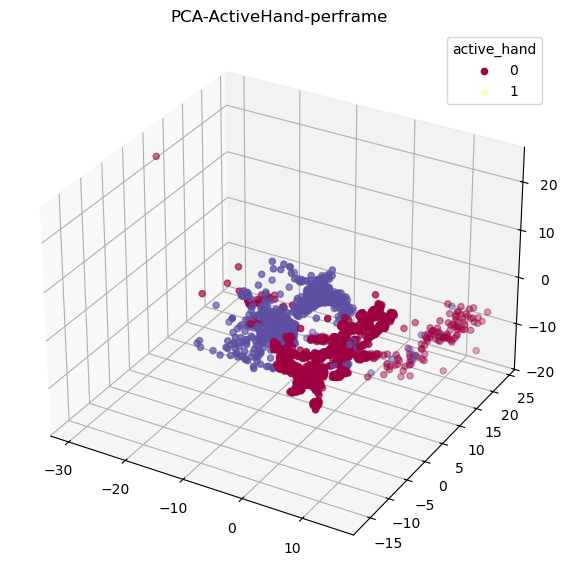

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/pca/ exists. Continuing with execution


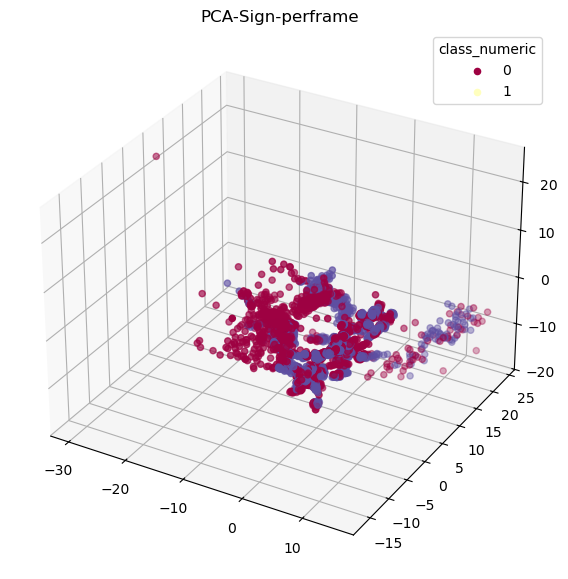

In [56]:
frm_PCA = PCA(n_components=3)
visualize(frm_PCA, PH3_FRM_PCA_df, label_col=sup.active_hand_col, title="PCA-ActiveHand-perframe", reducer_name=sup.PH3_REDUCER_NAME_PCA)
visualize(frm_PCA, PH3_FRM_PCA_df, label_col=sup.class_numeric_column, title="PCA-Sign-perframe", reducer_name=sup.PH3_REDUCER_NAME_PCA)

In [57]:
frm_big_PCA = PCA(n_components=10)
frm_big_PCA.fit(PH3_FRM_PCA_df)
frm_big_PCA.explained_variance_ratio_

array([0.3260363 , 0.24227072, 0.23768561, 0.08439059, 0.03720427,
       0.01558739, 0.0136132 , 0.01209149, 0.00732014, 0.00607694])

#### Writeout

In [58]:
writeout(PCA, sup.PH3_REDUCER_NAME_PCA, PH3_FRM_PCA_df, [sup.active_hand_col, sup.class_numeric_column], "perframe")

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/

### Per video

#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/pca/ exists. Continuing with execution


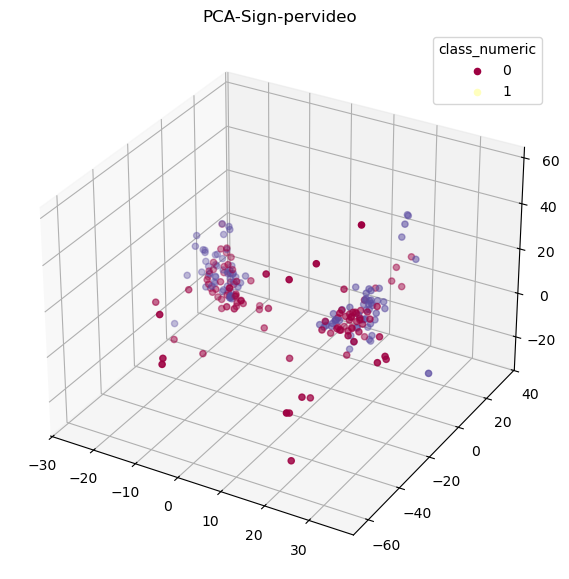

In [59]:
vid_PCA = PCA(n_components=3)
visualize(vid_PCA, PH3_VID_PCA_df, label_col=sup.class_numeric_column, title="PCA-Sign-pervideo", reducer_name=sup.PH3_REDUCER_NAME_PCA)

In [60]:
vid_big_PCA = PCA(n_components=10)
vid_big_PCA.fit(PH3_VID_PCA_df)
vid_big_PCA.explained_variance_ratio_

array([0.26193066, 0.21202273, 0.09962398, 0.0792595 , 0.05265554,
       0.04101122, 0.03141677, 0.03008864, 0.02456172, 0.0169946 ])

#### Writeout

In [61]:
writeout(PCA, sup.PH3_REDUCER_NAME_PCA, PH3_VID_PCA_df, sup.class_numeric_column, "pervideo")

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/

## Kernel PCA

In [62]:
PH3_FRM_KPCA_df = PH3_FRM_std_df.copy()
PH3_VID_KPCA_df = PH3_VID_std_df.copy()

### Per frame

#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/kpca/poly exists. Continuing with execution


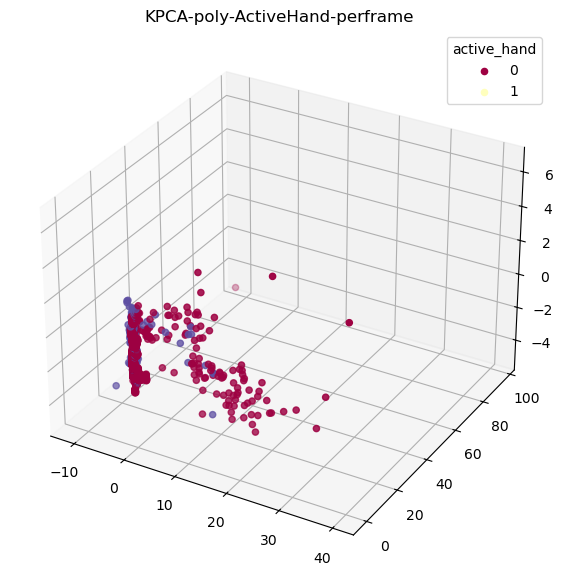

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/kpca/poly exists. Continuing with execution


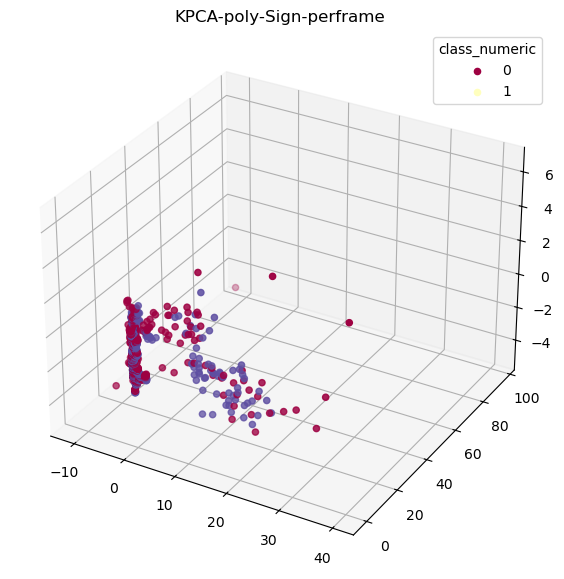

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/kpca/rbf exists. Continuing with execution


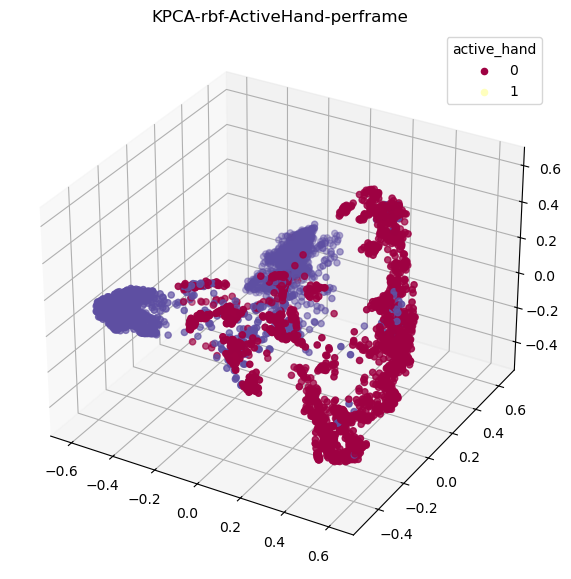

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/kpca/rbf exists. Continuing with execution


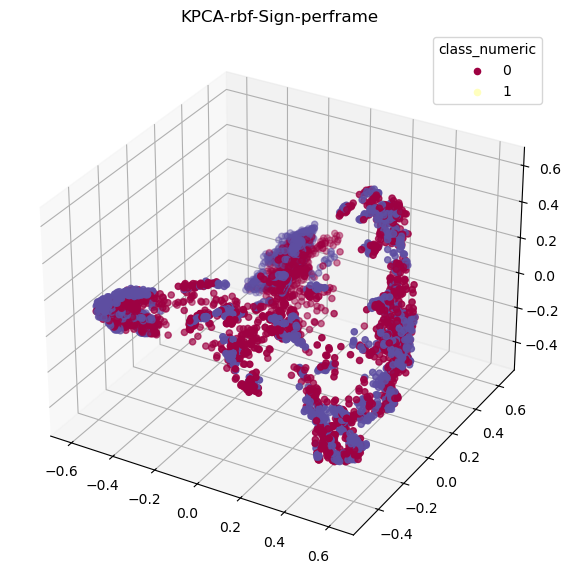

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/kpca/sigmoid exists. Continuing with execution


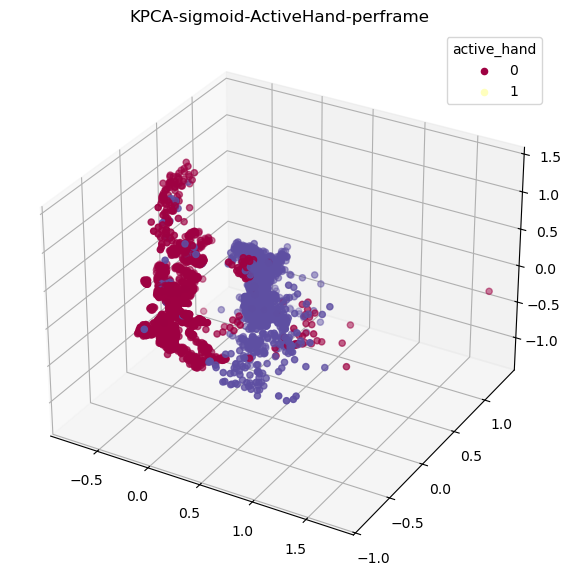

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/kpca/sigmoid exists. Continuing with execution


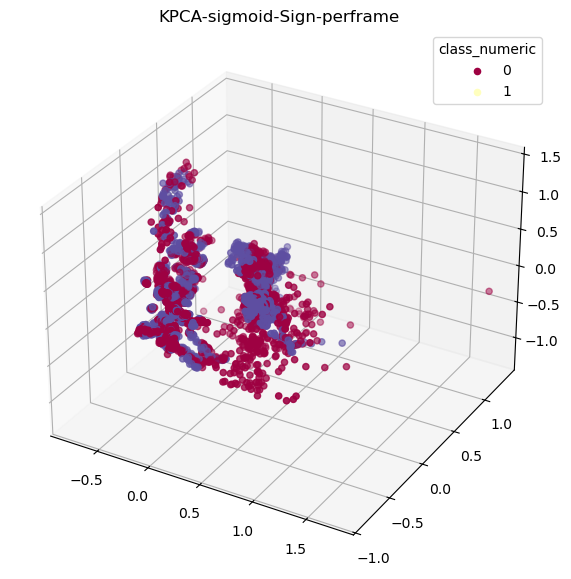

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/kpca/cosine exists. Continuing with execution


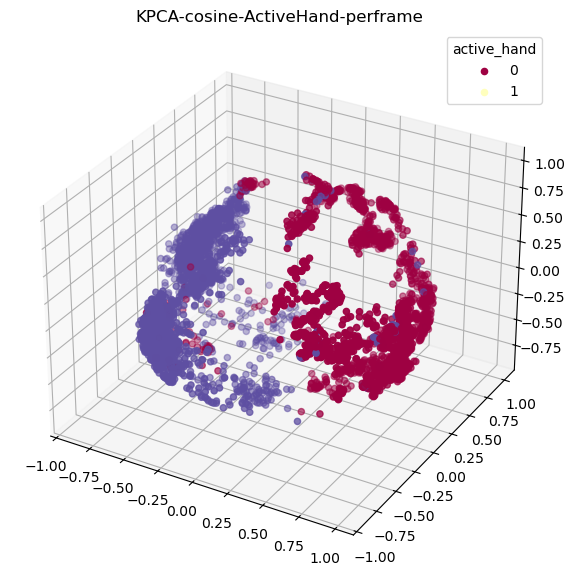

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/kpca/cosine exists. Continuing with execution


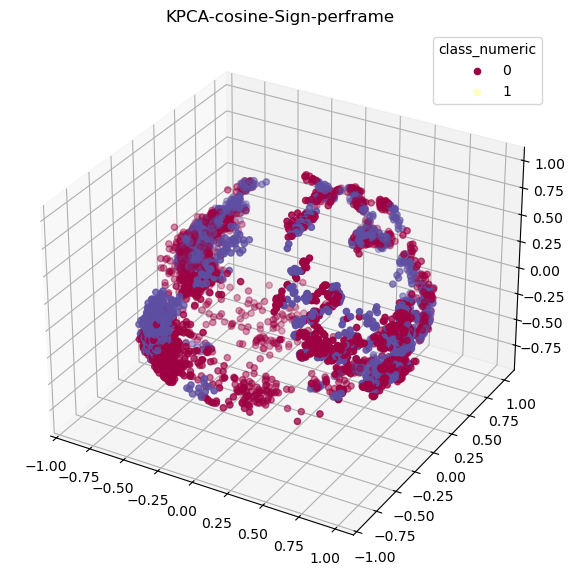

In [63]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  frm_KPCA = KernelPCA(kernel=kernel_name, n_components=3)
  visualize(frm_KPCA, PH3_FRM_KPCA_df, label_col=sup.active_hand_col, title=f"KPCA-{kernel_name}-ActiveHand-perframe", reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)
  visualize(frm_KPCA, PH3_FRM_KPCA_df, label_col=sup.class_numeric_column, title=f"KPCA-{kernel_name}-Sign-perframe", reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

#### Writeout

In [64]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  writeout(PCA, sup.PH3_REDUCER_NAME_KPCA, PH3_FRM_KPCA_df, [sup.active_hand_col, sup.class_numeric_column], "perframe", kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with ex

### Per video

#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/kpca/poly exists. Continuing with execution


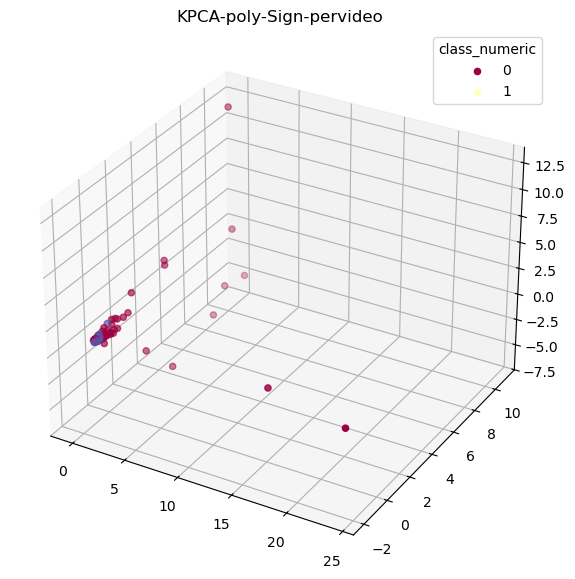

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/kpca/rbf exists. Continuing with execution


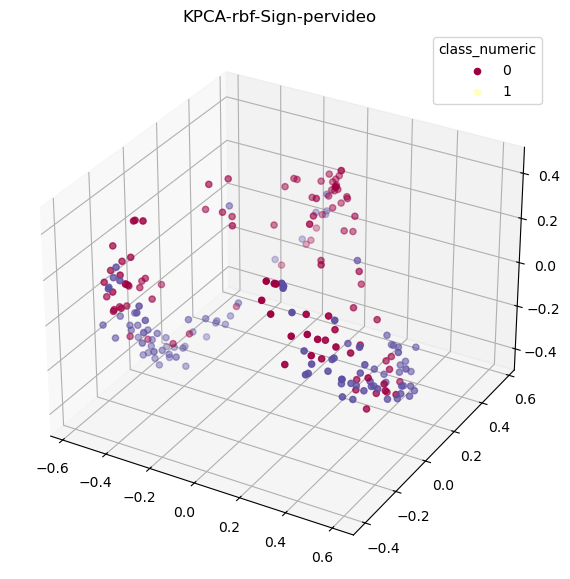

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/kpca/sigmoid exists. Continuing with execution


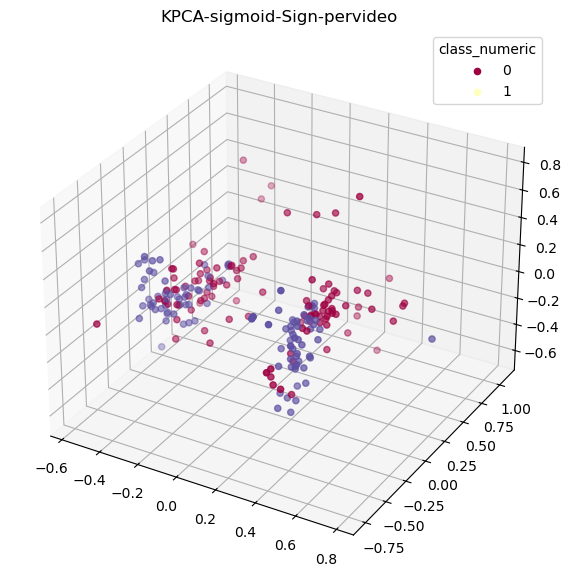

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/kpca/cosine exists. Continuing with execution


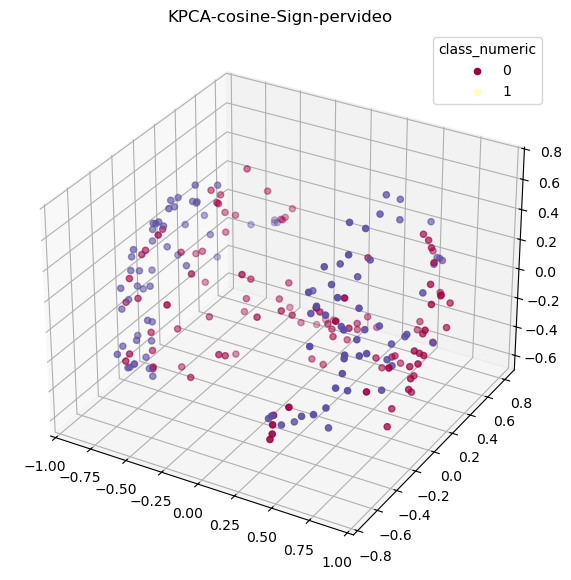

In [66]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  vid_KPCA = KernelPCA(kernel=kernel_name, n_components=3)
  visualize(vid_KPCA, PH3_VID_KPCA_df, label_col=sup.class_numeric_column, title=f"KPCA-{kernel_name}-Sign-pervideo", reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

#### Writeout

In [67]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  writeout(PCA, sup.PH3_REDUCER_NAME_KPCA, PH3_VID_PCA_df, sup.class_numeric_column, "pervideo", kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with ex

## UMAP

In [68]:
PH3_FRM_UMAP_df = PH3_FRM_std_df.copy()
PH3_VID_UMAP_df = PH3_VID_std_df.copy()

### Per frame

#### Exploration

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/umap/ does not exist. Creating it and continuing with execution


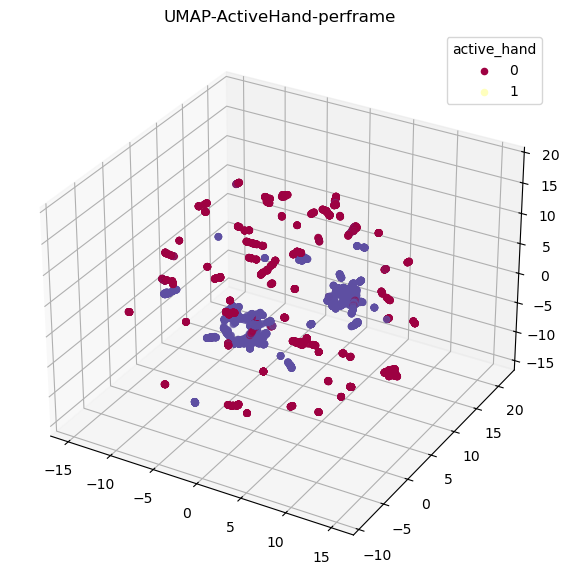

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


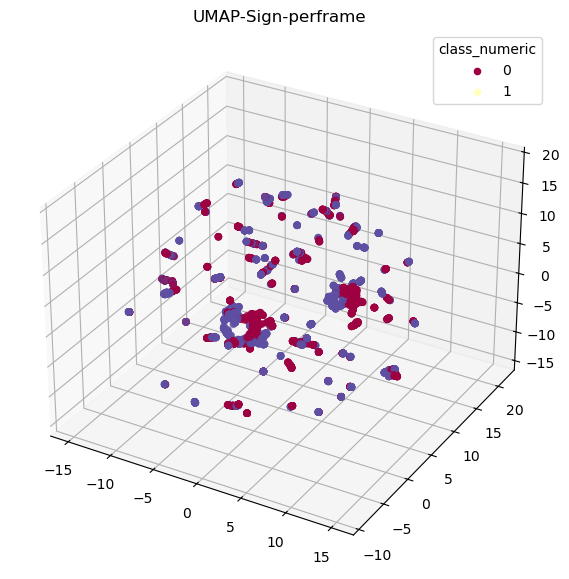

In [69]:
frm_UMAP = umap.UMAP(n_components=3, random_state=42)
visualize(frm_UMAP, PH3_FRM_UMAP_df, label_col=sup.active_hand_col, title="UMAP-ActiveHand-perframe", reducer_name=sup.PH3_REDUCER_NAME_UMAP)
visualize(frm_UMAP, PH3_FRM_UMAP_df, label_col=sup.class_numeric_column, title="UMAP-Sign-perframe", reducer_name=sup.PH3_REDUCER_NAME_UMAP)

#### Writeout

In [70]:
writeout(umap.UMAP, sup.PH3_REDUCER_NAME_UMAP, PH3_FRM_UMAP_df, [sup.active_hand_col, sup.class_numeric_column], "perframe")

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ does not exist. Creating it and continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ does not exist. Creating it and continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


### Per Video

#### Exploration

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


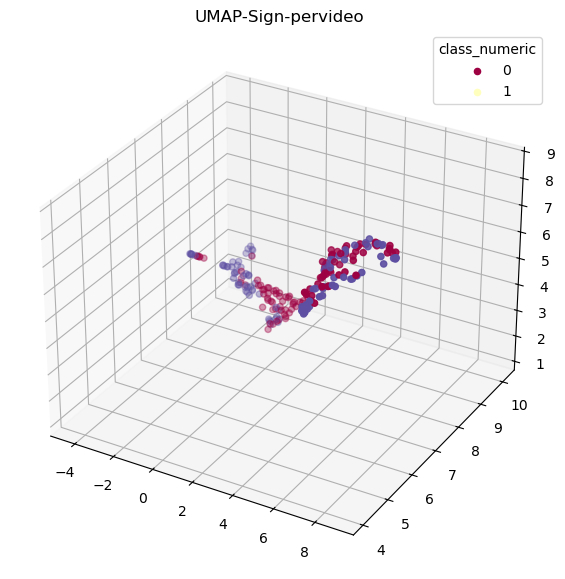

In [71]:
vid_UMAP = umap.UMAP(n_components=3, random_state=42)
visualize(vid_UMAP, PH3_VID_UMAP_df, label_col=sup.class_numeric_column, title="UMAP-Sign-pervideo", reducer_name=sup.PH3_REDUCER_NAME_UMAP)

#### Writeout

In [72]:
writeout(umap.UMAP, sup.PH3_REDUCER_NAME_UMAP, PH3_VID_UMAP_df, sup.class_numeric_column, "pervideo")

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/w2/reduce/umap/ exists. Continuing with execution
